
# Work

   1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
   2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果



In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [3]:
train, test = keras.datasets.cifar10.load_data()

x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [4]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
LEARNING_RATE = 1e-3
EPOCHS = 10 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024

In [6]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""
建立實驗的比較組合
"""
reduce_lr_factor = [0.5, 0.75]
redice_lr_patient = [5, 10]

In [7]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                                  min_lr=1e-12, 
                                  monitor='val_loss', 
                                  patience=reduce_patient, 
                                  verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.50, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalizatio

50000/50000 [==============================] - 5s 98us/step - loss: 1.4211 - acc: 0.5066 - val_loss: 1.5533 - val_acc: 0.4524
Epoch 8/10
50000/50000 [==============================] - 5s 98us/step - loss: 1.3855 - acc: 0.5179 - val_loss: 1.5523 - val_acc: 0.4571
Epoch 9/10
50000/50000 [==============================] - 5s 100us/step - loss: 1.3534 - acc: 0.5281 - val_loss: 1.5416 - val_acc: 0.4544
Epoch 10/10
50000/50000 [==============================] - 5s 98us/step - loss: 1.3243 - acc: 0.5383 - val_loss: 1.5211 - val_acc: 0.4671
Numbers of exp: 3, reduce_factor: 0.75, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_

Epoch 4/10
50000/50000 [==============================] - 6s 120us/step - loss: 1.3911 - acc: 0.5070 - val_loss: 1.6401 - val_acc: 0.4272
Epoch 5/10
50000/50000 [==============================] - 6s 126us/step - loss: 1.3359 - acc: 0.5291 - val_loss: 1.5393 - val_acc: 0.4480
Epoch 6/10
50000/50000 [==============================] - 7s 137us/step - loss: 1.2820 - acc: 0.5474 - val_loss: 1.6182 - val_acc: 0.4205
Epoch 7/10
50000/50000 [==============================] - 6s 125us/step - loss: 1.2390 - acc: 0.5612 - val_loss: 1.6304 - val_acc: 0.4284
Epoch 8/10
50000/50000 [==============================] - 6s 118us/step - loss: 1.1980 - acc: 0.5762 - val_loss: 1.5662 - val_acc: 0.4488
Epoch 9/10
50000/50000 [==============================] - 6s 123us/step - loss: 1.1568 - acc: 0.5913 - val_loss: 1.5105 - val_acc: 0.4758
Epoch 10/10
50000/50000 [==============================] - 6s 120us/step - loss: 1.1157 - acc: 0.6066 - val_loss: 1.5613 - val_acc: 0.4562
Numbers of exp: 6, reduce_factor:

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 126us/step - loss: 1.8025 - acc: 0.3751 - val_loss: 2.2288 - val_acc: 0.3140
Epoch 2/10
50000/50000 [==============================] - 5s 107us/step - loss: 1.5402 - acc: 0.4553 - val_loss: 2.5433 - val_acc: 0.2501
Epoch 3/10
50000/50000 [==============================] - 5s 109us/step - loss: 1.4335 - acc: 0.4943 - val_loss: 2.3657 - val_acc: 0.2676
Epoch 4/10
50000/50000 [==============================] - 5s 102us/step - loss: 1.3613 - acc: 0.5196 - val_loss: 2.6336 - val_acc: 0.2284
Epoch 5/10
50000/50000 [==============================] - 5s 103us/step - loss: 1.3051 - acc: 0.5365 - val_loss: 2.0643 - val_acc: 0.3232
Epoch 6/10
50000/50000 [==============================] - 5s 103us/step - loss: 1.2542 - acc: 0.5596 - val_loss: 2.0661 - val_acc: 0.3145
Epoch 7/10
50000/50000 [==============================] - 5s 104us/step - loss: 1.2053 - acc: 0.5751 - val_loss: 2.0724 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 8s 152us/step - loss: 1.8050 - acc: 0.3725 - val_loss: 2.0716 - val_acc: 0.3056
Epoch 2/10
50000/50000 [==============================] - 5s 108us/step - loss: 1.5299 - acc: 0.4571 - val_loss: 2.3872 - val_acc: 0.2638
Epoch 3/10
50000/50000 [==============================] - 5s 103us/step - loss: 1.4226 - acc: 0.4986 - val_loss: 2.4583 - val_acc: 0.2689
Epoch 4/10
50000/50000 [==============================] - 5s 104us/step - loss: 1.3489 - acc: 0.5232 - val_loss: 1.7406 - val_acc: 0.3805
Epoch 5/10
50000/50000 [==============================] - 5s 105us/step - loss: 1.2917 - acc: 0.5448 - val_loss: 2.7835 - val_acc: 0.2206
Epoch 6/10
50000/50000 [==============================] - 5s 104us/step - loss: 1.2355 - acc: 0.5636 - val_loss: 2.0136 - val_acc: 0.3065
Epoch 7/10
50000/50000 [==============================] - 5s 103us/step - loss: 1.1932 - acc: 0.5794 - val_loss: 1.9931 - 

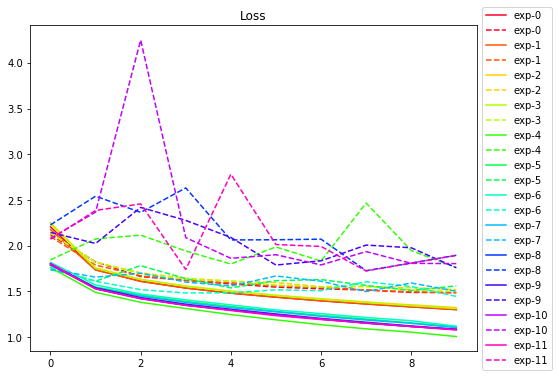

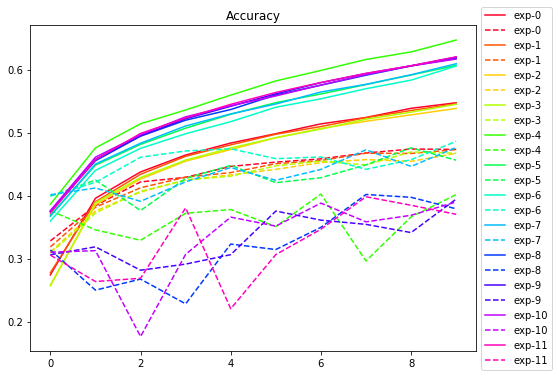

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()